# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | udachny
Processing Record 3 of Set 1 | colonia
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | lumberton
Processing Record 7 of Set 1 | nova sintra
Processing Record 8 of Set 1 | tobol'sk
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | lata
Processing Record 11 of Set 1 | lae
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | juan griego
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | kutum
Processing Record 17 of Set 1 | hohenmolsen
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | alice springs
Processing Record 20 of Set 1 | menzelinsk
Processing Record 21 of Set 1 | scarborough
Processing Record 22 of Set 1 | guerrero negro
Processing Rec

City not found. Skipping...
Processing Record 41 of Set 4 | mende
Processing Record 42 of Set 4 | castillos
Processing Record 43 of Set 4 | ad dilam
Processing Record 44 of Set 4 | touros
Processing Record 45 of Set 4 | puerto baquerizo moreno
Processing Record 46 of Set 4 | abu dhabi
Processing Record 47 of Set 4 | kavarna
Processing Record 48 of Set 4 | margate
Processing Record 49 of Set 4 | cumaribo
City not found. Skipping...
Processing Record 0 of Set 5 | vadso
Processing Record 1 of Set 5 | vila do maio
Processing Record 2 of Set 5 | tual
Processing Record 3 of Set 5 | tralee
Processing Record 4 of Set 5 | selfoss
Processing Record 5 of Set 5 | bakanas
Processing Record 6 of Set 5 | severobaykal'sk
Processing Record 7 of Set 5 | afaahiti
Processing Record 8 of Set 5 | petropavlovka
Processing Record 9 of Set 5 | christchurch
Processing Record 10 of Set 5 | lesnoy
Processing Record 11 of Set 5 | arrifes
Processing Record 12 of Set 5 | cidreira
Processing Record 13 of Set 5 | sara

Processing Record 30 of Set 8 | galliano
Processing Record 31 of Set 8 | iowa falls
Processing Record 32 of Set 8 | richards bay
Processing Record 33 of Set 8 | ilgin
Processing Record 34 of Set 8 | fort st. john
Processing Record 35 of Set 8 | aginskoye
Processing Record 36 of Set 8 | lodja
Processing Record 37 of Set 8 | peskovka
Processing Record 38 of Set 8 | labuan
Processing Record 39 of Set 8 | ourilandia do norte
City not found. Skipping...
Processing Record 40 of Set 8 | mount isa
Processing Record 41 of Set 8 | nieuw amsterdam
Processing Record 42 of Set 8 | selebi-phikwe
Processing Record 43 of Set 8 | puerto san carlos
City not found. Skipping...
Processing Record 44 of Set 8 | saint-yrieix-la-perche
Processing Record 45 of Set 8 | toga village
City not found. Skipping...
Processing Record 46 of Set 8 | lautoka
Processing Record 47 of Set 8 | cantaura
City not found. Skipping...
Processing Record 48 of Set 8 | da nang
Processing Record 49 of Set 8 | matoury
Processing Recor

Processing Record 11 of Set 12 | nemuro
Processing Record 12 of Set 12 | kuybyshev
Processing Record 13 of Set 12 | vinukonda
Processing Record 14 of Set 12 | ilomantsi
Processing Record 15 of Set 12 | juneau
Processing Record 16 of Set 12 | puerto ayacucho
Processing Record 17 of Set 12 | callao
Processing Record 18 of Set 12 | lensk
Processing Record 19 of Set 12 | vetlanda
Processing Record 20 of Set 12 | tres isletas
Processing Record 21 of Set 12 | aracataca
Processing Record 22 of Set 12 | gubkin
Processing Record 23 of Set 12 | dabeiba
Processing Record 24 of Set 12 | thinadhoo
Processing Record 25 of Set 12 | el paujil
Processing Record 26 of Set 12 | valentin gomez farias
Processing Record 27 of Set 12 | tambura
Processing Record 28 of Set 12 | leua
Processing Record 29 of Set 12 | maitum
Processing Record 30 of Set 12 | colonia menno
Processing Record 31 of Set 12 | kone
Processing Record 32 of Set 12 | kibre mengist
Processing Record 33 of Set 12 | quepos
Processing Record 3

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,270.17,63,100,1.03,IS,1709202879
1,udachny,66.4167,112.4000,259.51,77,100,2.50,RU,1709202881
2,colonia,50.9333,6.9500,283.69,56,0,4.12,DE,1709202771
3,arraial do cabo,-22.9661,-42.0278,300.07,89,40,3.09,BR,1709202882
4,katsuura,35.1333,140.3000,284.54,70,99,2.65,JP,1709202883


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

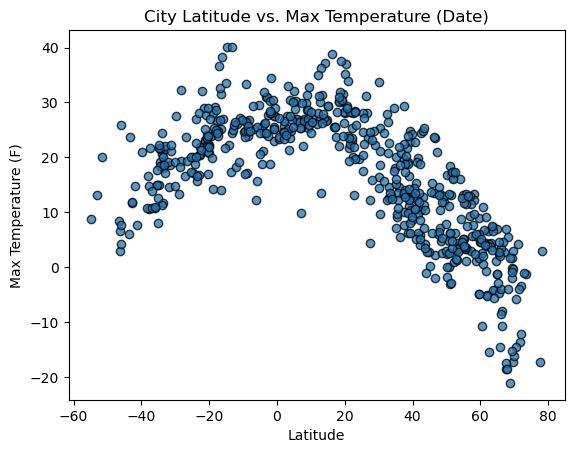

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


# Save the figure
plt.savefig("../output_data/1Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

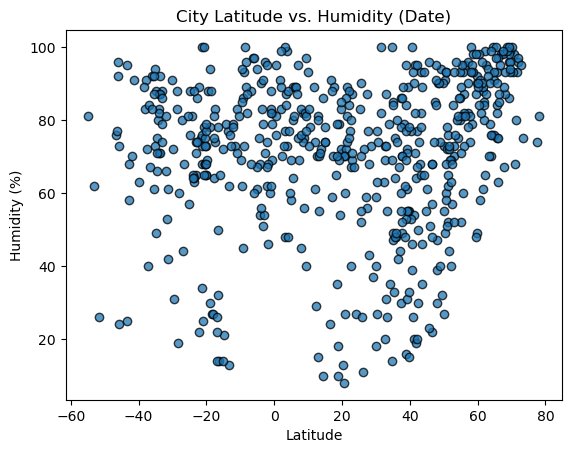

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/1Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

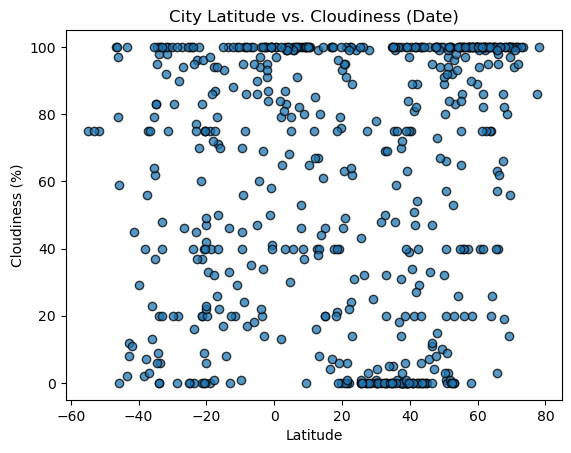

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/1Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

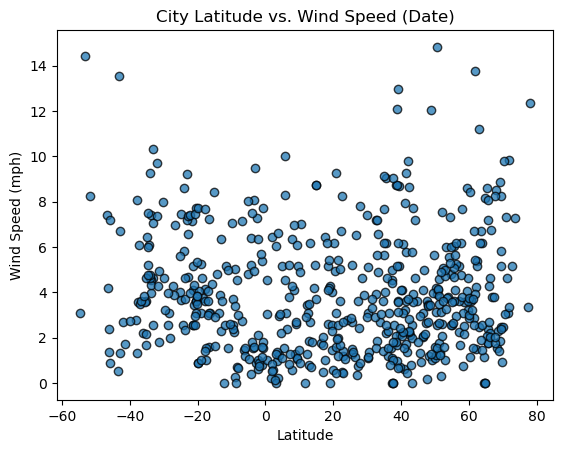

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output_data/1Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'Max Temperature vs. Latitude Linear Regression (Northern Hemisphere)')

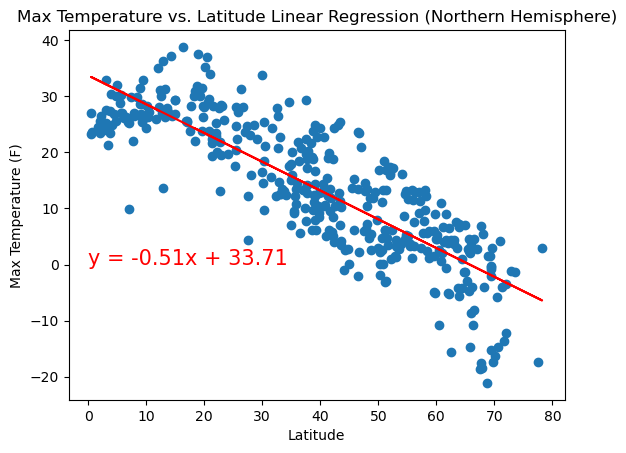

In [32]:
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern, y_values_northern)
regress_values = x_values_northern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values, "r-")

# Annotate the regression line equation
plt.annotate(line_eq, (0, 0), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temperature vs. Latitude Linear Regression (Northern Hemisphere)")


Text(0.5, 1.0, 'Max Temperature vs. Latitude Linear Regression (Southern Hemisphere)')

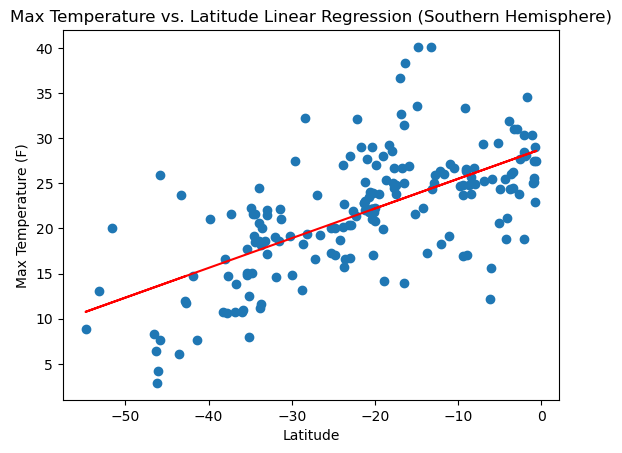

In [33]:
# Linear regression on Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)
regress_values = x_values_southern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values, "r-")

# Annotate the regression line equation
plt.annotate(line_eq, (0, 0), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temperature vs. Latitude Linear Regression (Southern Hemisphere)")

**Discussion about the linear relationship:** The Northern Hemisphere has a moderately strong positive lineare relationship between latitude and the max temperature. This relationship indicates that the further north you go, the colder it gets. As expected, the Southern Hemisphere also shows a positive linear relationship between latitude and the max temperature, however it is not as strong as the Northern Hemisphere relationship.  This relationship indicates that the further south you go, the colder it gets.

### Humidity vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'Humidity % vs. Latitude Linear Regression (Northern Hemisphere)')

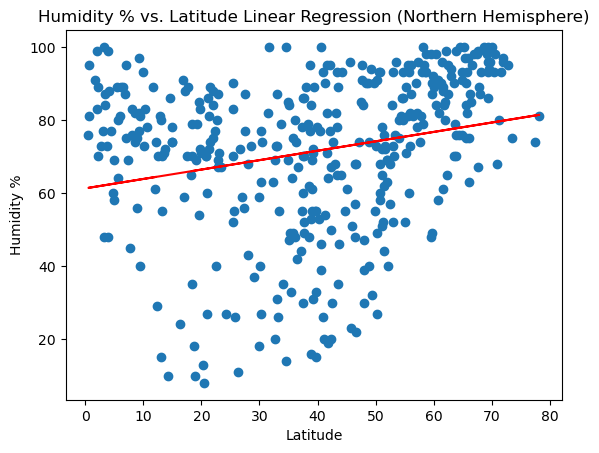

In [34]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern, y_values_northern)
regress_values = x_values_northern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values, "r-")

# Annotate the regression line equation
plt.annotate(line_eq, (0, 0), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Humidity % vs. Latitude Linear Regression (Northern Hemisphere)")

Text(0.5, 1.0, 'Humidity % vs. Latitude Linear Regression (Southern Hemisphere)')

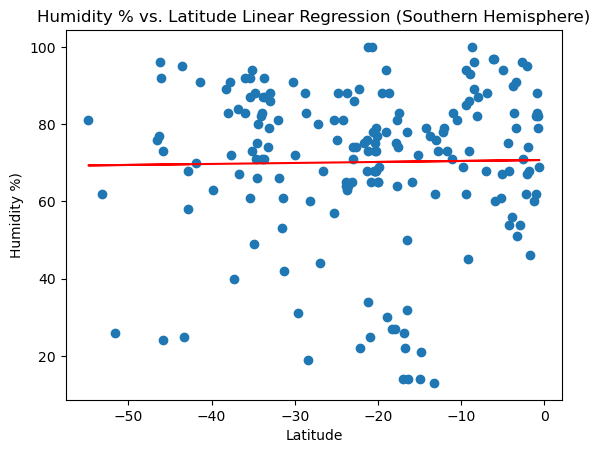

In [35]:
#Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)
regress_values = x_values_southern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values, "r-")

# Annotate the regression line equation
plt.annotate(line_eq, (0, 0), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity %)")
plt.title("Humidity % vs. Latitude Linear Regression (Southern Hemisphere)")

**Discussion about the linear relationship:** The northern hemisphere shows a very weak positive linear relationship. This means there is not much of a change in humidity as you travel further north. The southern hemisphere shows similiar results.

### Cloudiness vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'Cloudiness vs. Latitude Linear Regression (Northern Hemisphere)')

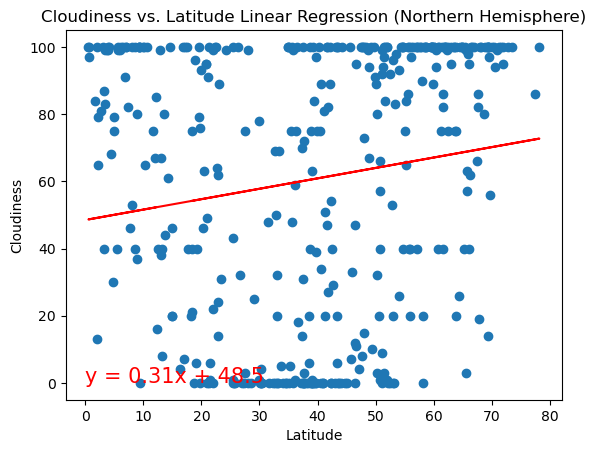

In [36]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern, y_values_northern)
regress_values = x_values_northern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values, "r-")

# Annotate the regression line equation
plt.annotate(line_eq, (0, 0), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude Linear Regression (Northern Hemisphere)")

Text(0.5, 1.0, 'Cloudiness vs. Latitude Linear Regression (Southern Hemisphere)')

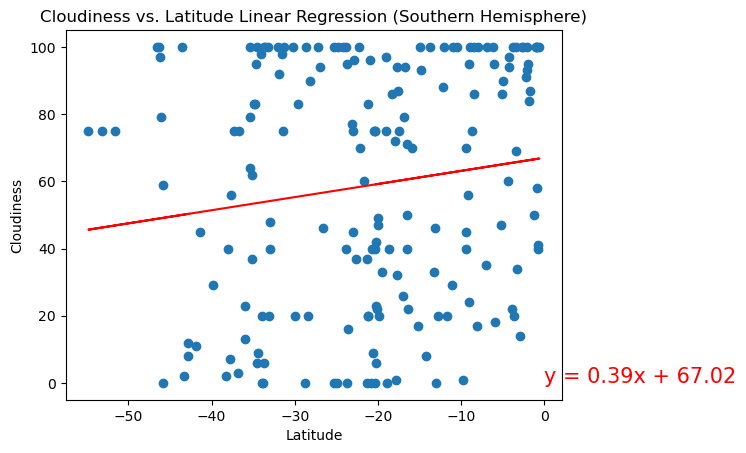

In [37]:
#Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)
regress_values = x_values_southern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values, "r-")

# Annotate the regression line equation
plt.annotate(line_eq, (0, 0), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude Linear Regression (Southern Hemisphere)")

**Discussion about the linear relationship:** Both the northern and southern hemisphere data show a very weak positive relationship between cloudiness and latitude. This means that cloudiness is only very mildly affected the further from the equator you travel in either direction.

### Wind Speed vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'Wind Speed vs. Latitude Linear Regression (Northern Hemisphere)')

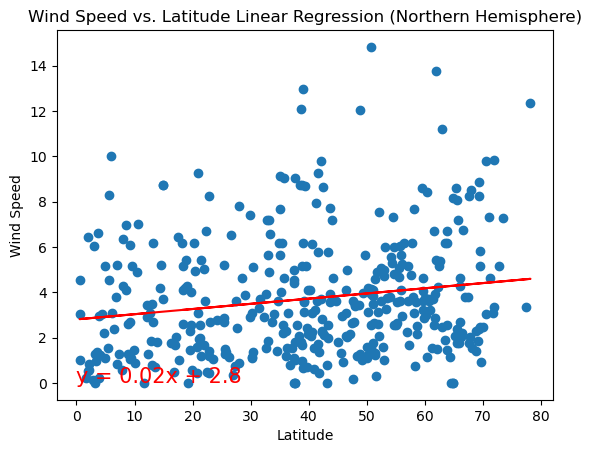

In [38]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern, y_values_northern)
regress_values = x_values_northern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values, "r-")

# Annotate the regression line equation
plt.annotate(line_eq, (0, 0), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude Linear Regression (Northern Hemisphere)")

The r-value is: 0.030396762354449467


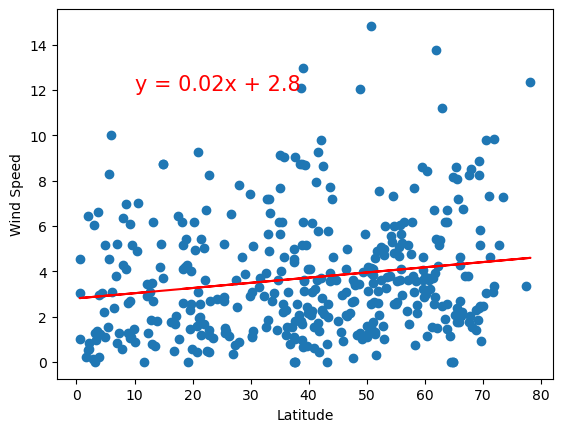

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

Text(0.5, 1.0, 'Wind Speed vs. Latitude Linear Regression (Southern Hemisphere)')

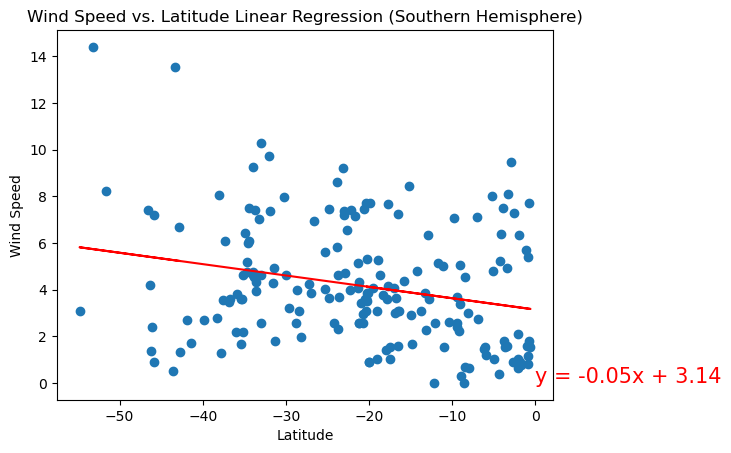

In [39]:
#Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)
regress_values = x_values_southern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values, "r-")

# Annotate the regression line equation
plt.annotate(line_eq, (0, 0), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude Linear Regression (Southern Hemisphere)")

The r-value is: 0.062239040700515696


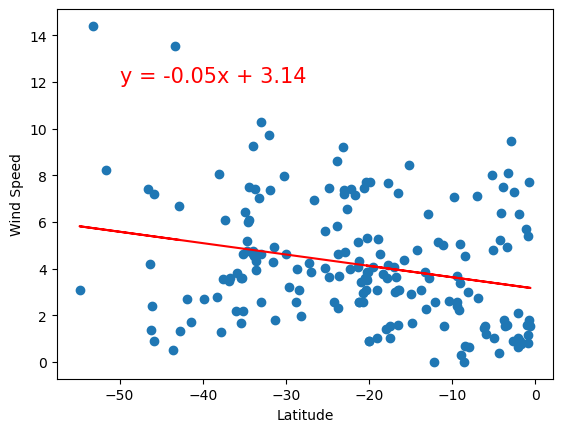

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** Both the northern and southern hemisphere data show a very weak positive relationship between wind speed and latitude. With the relationship being a little bit stronger in the southern hemisphere. This means that wind speed is only very mildly affected the further from the equator you travel in either direction.